# E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.
### Be careful: 
There are two sheets (one is detailed) and second is encoded in the excel file. You may use any of them by extracting in separate excel sheet. The number of column(s) is more than 47. Read the column header carefully.
Note : Data Scientists have to apply their analytical skills to give findings and conclusions in detailed data analysis written in jupyter notebook . 
### Only data analysis is required.   
Need not to create machine learning models /but still if anybody comes with it that is welcome.


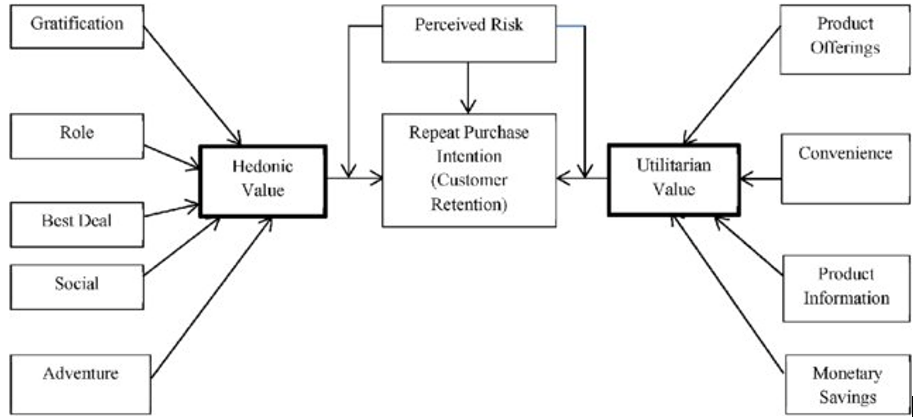

# Importing Libraries

In [1]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler

# To display all columns
pd.pandas.set_option('display.max_columns',None)

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Reading File

In [4]:
df = pd.read_excel('customer_retention_dataset.xlsx')

# -------------------------------Getting to Know About Data---------------------------------------

## 1. Overall Data Analysis¶

In [5]:
# getting to know size of data set, to know overall records, and columns
print(f'Number of rows and columns in given Data Frame is {df.shape}')

Number of rows and columns in given Data Frame is (269, 71)


In [6]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [7]:
df.tail()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [8]:
df.sample(10)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

### Observation - 
1. There are 71 features and 269 records in data set.
2. All features consists of questions, on which customers responce is recoreded.
3. We will see detailed, description/meaning of features in EDA.

## 2. Checking and Handling Duplicate Values

In [9]:
# Removing duplicate values
df.duplicated().sum()

166

In [10]:
# There are 166 duplicated values and these must be dropped
df.drop_duplicates(inplace=True)

In [11]:
# getting to know size of data set after dropping duplicates
print(f'Number of rows and columns After dropping duplicates are {df.shape}')

Number of rows and columns After dropping duplicates are (103, 71)


### Observation - 
1. There are 166 duplicate values in data set
2. Duplicates dosen't play any role in analysis, unique values must be considered for processing
3. To save time, processing power, Cost - these duplicates must be dropped
4. After dropping duplicates, we have 103 records.
    - Total 269 - 103 = 166 Duplicate values
    - Around 61% of our values are same.
    - Only 103 unique values remained

## 3. Getting to Know More About Data Type

In [12]:
df.dtypes.value_counts()

object    70
int64      1
dtype: int64

### Observation - 
1. There are 70 categorical features
2. Only one numerical features, and that is "What is the Pin Code of where you shop online from?" which can also trated as Categorical Feature

## 4 Gettting to Know Five Number Summery for Continuous variable

In [13]:
df.describe()

,4 What is the Pin Code of where you shop online from?
count,103.000000
mean,232449.844660
std,150755.596481
min,110008.000000
25%,132001.000000
50%,201305.000000
75%,202156.500000
max,560037.000000


### Observation - 
- As there is only one Numerical feature, i.e. Pincode it can be treated as Category. 
- As pincode nuumber dosent have any meaning in Numerical form. It is just unique identification for representing City/Village/Towns

## 5 Gettting to Know Summery for Categorical variable¶

In [14]:
df.describe(include='O')

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
count,103,103,103,103

### Observation -
- 1 Gender of respondent: 
    - There are 2 categories, Female being Mode with 66. 
- 2 How old are you?
    - There are 5 categories grouped, in which 21-30 being mode with 32 count.
- 3 Which city do you shop online from?
    - Delhi being Mode with 22 count and total 11 categories
- 5 Since How Long You are Shopping Online ?
    - There are 5 categories and "Above 4 years" being mode with 39.
- 6 How many times you have made an online purchase in the past 1 year?
    - People purchased less than 10 times in year with count as 39. Total 6 categories.
- 7 How do you access the internet while shopping on-line?
    - Out of 166, total 70 people used "MObile Data" for ordering. 
- 8 Which device do you use to access the online shopping?
    - With 4 categories, Smartphone being the most used item to order online.
- 9 What is the screen size of your mobile device?
    - Around 50 people have choosen other option than listed in Form.
- 10 What is the operating system (OS) of your device?
    - With 3 categories, Window/windows Mobile being mode with 46 count.
- 11 What browser do you run on your device to access the website?
    - Most of the people are using chrome browser. Around 80 people out of 166.
- 12 Which channel did you follow to arrive at your favorite online store for the first time.
    - Three categoris, Search Engine being mode with 86 count.
- 13 After first visit, how do you reach the online retail store?
    - Total 5 categories, with mode "Via application"
- 14 How much time do you explore the e- retail store before making a purchase decision?
    - Around 48 people spend more than 15 mins to explore e-retail before making a purchase.
- 15 What is your preferred payment Option? 
    - 59/166 people preffered "Credit/Debit cards" for payment. Total 3 categories.
- 16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart).
    - Sometimes being mode with 69 count, with total 4 categoris.
- 17 Why did you abandon the “Bag”, “Shopping Cart”
    - Most of the customers opted abandoning Bag for Better alternative offer.
- 18 The content on the website must be easy to read and understand.
    - 4 Category, with Mode being Strongly agree (5) with 60 count.
- 19 Information on similar product to the one highlighted  is important for product comparison.
    - 4 Category, with Mode being Strongly agree (5) with 60 count.
- 20 Complete information on listed seller and product being offered is important for purchase decision.
    - Agree (4)	being mode with 38/166 counts. Total Categories 5
- 21 All relevant information on listed products must be stated clearly.
    - Agree (4)	being mode with 54/166 counts. Total Categories 4
- 22 Ease of navigation in website'
    - Strongly agree (5) being mode with 51/166 counts and 4 categories.
- 23 Loading and processing speed'.
    - Strongly agree (5) being mode with 48/166 counts and 5 categories.
- 24 User friendly Interface of the website'.
    - Strongly agree (5) being mode with 72/166 counts and 5 categories.
- 25 Convenient Payment methods'.
    - Strongly agree (5) being mode with 60/166 counts and 3 categories.
- 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'
    - Strongly agree (5) being mode with 52/166 counts and 4 categories.
- 27 Empathy (readiness to assist with queries) towards the customers'.
    - Strongly agree (5) being mode with 75/166 counts and 4 categories.
- 28 Being able to guarantee the privacy of the customer'.
    - Strongly agree (5) being mode with 69/166 counts and 3 categories.
- 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'
    - Strongly agree (5) being mode with 59/166 counts and 4 categories.
- 30 Online shopping gives monetary benefit and discounts'
    - Strongly agree (5) being mode with 41/166 counts and 5 categories.
- 31 Enjoyment is derived from shopping online'.
    - Strongly agree (5) being mode with 34/166 counts and 5 categories.
- 32 Shopping online is convenient and flexible'.
    - Strongly agree (5) being mode with 56/166 counts and 4 categories.
- 33 Return and replacement policy of the e-tailer is important for purchase decision'.
    - Strongly agree (5) being mode with 76/166 counts and 3 categories.
- 34 Gaining access to loyalty programs is a benefit of shopping online'.
    - Strongly agree (5) being mode with 44/166 counts and 5 categories.
- 35 Displaying quality Information on the website improves satisfaction of customers'.
    - Strongly agree (5) being mode with 49/166 counts and 3 categories.
- 36 User derive satisfaction while shopping on a good quality website or application'.
    - Strongly agree (5) being mode with 66/166 counts and 3 categories.
- 37 Net Benefit derived from shopping online can lead to users satisfaction'.
    - Strongly agree (5) being mode with 61/166 counts and 4 categories.
- 38 User satisfaction cannot exist without trust'.
    - Strongly agree (5) being mode with 47/166 counts and 5 categories.
- 39 Offering a wide variety of listed product in several category'.
    - Strongly agree (5) being mode with 42/166 counts and 4 categories.
- 40 Provision of complete and relevant product information'
    - Strongly agree (5) being mode with 48/166 counts and 4 categories.
- 41 Monetary savings'
    - Strongly agree (5) being mode with 59/166 counts and 4 categories.
- 42 The Convenience of patronizing the online retailer'
    - Agree (4) being mode with 55/166 counts and 3 categories.
- 43 Shopping on the website gives you the sense of adventure'
    - Agree (4) being mode with 42/166 counts and 5 categories.
- 44 Shopping on your preferred e-tailer enhances your social status'
    - indifferent (3) being mode with 39/166 counts and 5 categories.
- 45 You feel gratification shopping on your favorite e-tailer'
    - indifferent (3) being mode with 38/166 counts and 5 categories.
- 46 Shopping on the website helps you fulfill certain roles'
    - indifferent (3) being mode with 35/166 counts and 5 categories.
- 47 Getting value for money spent'
    - Agree (4) being mode with 57/166 counts and 5 categories.
- From the following, tick any (or all) of the online retailers you have shopped from;'
    - Amazon.in, Flipkart.com, Paytm.com, Myntra.com. being mode with 36 count with 9 categories
- Easy to use website or application'
    - Amazon.in, Flipkart.com, Paytm.com, Myntra.com. being mode with 28 count with 10 categories
- Visual appealing web-page layout', 'Wild variety of product on offer'
- Complete, relevant description information of products'
- Fast loading website speed of website and application'
- Reliability of the website or application'
- Quickness to complete purchase'
- Availability of several payment options', 'Speedy order delivery '
- Privacy of customers’ information'
- Security of customer financial information'
- Perceived Trustworthiness'
- Presence of online assistance through multi-channel'
- Longer time to get logged in (promotion, sales period)'
- Longer time in displaying graphics and photos (promotion, sales period)'
- Late declaration of price (promotion, sales period)'
- Longer page loading time (promotion, sales period)'
- Limited mode of payment on most products (promotion, sales period)'
- Longer delivery period', 'Change in website/Application design'
- Frequent disruption when moving from one page to another'
- Website is as efficient as before'
- Which of the Indian online retailer would you recommend to a friend?'

## 6 Getting to Know About Missing Values

In [15]:
# Feature Wise missing Values
df.isnull().sum().sum()

0

In [16]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 0 missing values in dataset


### Observation -
From results we can see that, there are no missing values in dataset.

# --------------------------------------------------EDA------------------------------------------------------

In [17]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [18]:
print(f'Total Categorical Features are {len(categorical_features)}')

Total Categorical Features are 70


## 1. Count Plot for Understanding Categorical Data Distribuion

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df)
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

### Observation - 

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue='1Gender of respondent')
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[10])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[7])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[22])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[24])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[40])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[46])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[56])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[60])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[55])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[66])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[-1])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[-2])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

In [ ]:
for feature in categorical_features:
    # Countplot for Attrition
    plt.figure(dpi=100)
    plot = sns.countplot(feature, data=df, hue=df.columns[-3])
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
    # print(df[feature].value_counts())
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))